In [1]:
import time
from time import process_time

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# import dataset
dataset = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = dataset.load_data()

# formatting and reshaping data
train_data= np.array(train_data, np.float32)
test_data = np.array(test_data, np.float32)

train_data = train_data.reshape([-1, 784])
test_data = test_data.reshape([-1, 784])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)


In [ ]:
from sklearn.svm import SVC, LinearSVC

#svm_non_reg = LinearSVC(dual=False,random_state=0)
# SVM with regularization
svm_with_reg = LinearSVC(random_state=0,penalty="l2", loss="squared_hinge", dual=True)
svm_with_reg.fit(train_data,train_labels)
pred = svm_with_reg.predict(test_data)

In [2]:
# with SGD
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01,penalty="l2", loss="hinge")
 
sgdc.fit(train_data, train_labels)
pred = sgdc.predict(test_data)


-------------------------------------------------------
The accuracy score:  0.9124
-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


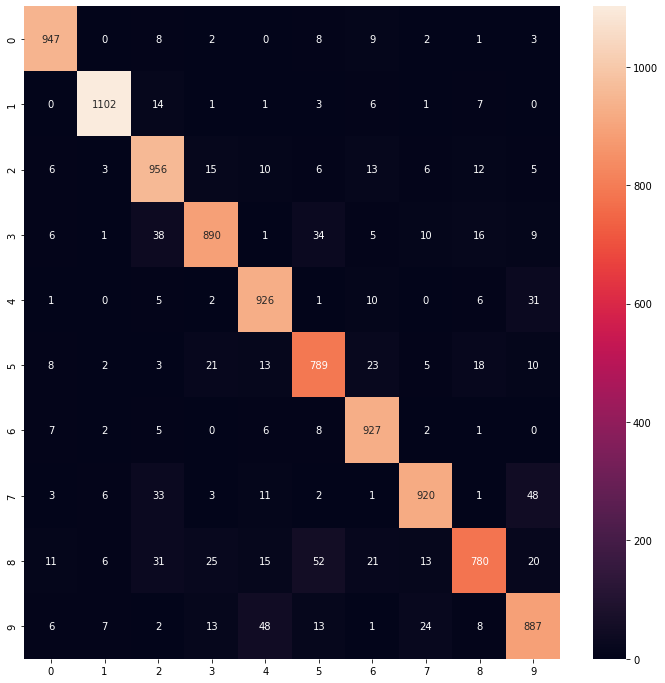

In [3]:
from sklearn.metrics import accuracy_score
import seaborn as sns

print("-------------------------------------------------------")
print("The accuracy score: ", accuracy_score(test_labels,pred))
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,pred)
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')